<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pythonday28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [1]:
path = '/content/drive/MyDrive/Dataset/extended_marketing_data.xlsx'

In [3]:
import pandas as pd
df = pd.read_excel(path)
df.head(15)

,Customer ID,Age,Gender,Total Spent,Converted,Comments
0,1,23,F,150,1,Satisfied with the service
1,2,35,M,600,1,Needs improvement in delivery
2,3,45,F,800,0,Regular customer
3,4,52,M,200,0,Occasional buyer
4,5,29,F,300,1,High spender
5,6,41,M,450,0,Average experience
6,7,38,F,670,1,Prefers online shopping
7,8,27,M,120,1,New customer
8,9,50,F,500,0,Loyal to the brand
9,10,33,M,750,1,High conversion rate


In [6]:
df.describe()

,Customer ID,Age,Total Spent,Converted
count,15.000000,15.000000,15.000000,15.000000
mean,8.000000,36.866667,444.666667,0.600000
std,4.472136,9.179688,214.405046,0.507093
min,1.000000,23.000000,120.000000,0.000000
25%,4.500000,30.500000,295.000000,0.000000
50%,8.000000,36.000000,450.000000,1.000000
75%,11.500000,43.000000,605.000000,1.000000
max,15.000000,52.000000,800.000000,1.000000


In [7]:
gender_distribution = df['Gender'].value_counts()
print(gender_distribution)

Gender
F    8
M    7
Name: count, dtype: int64


In [8]:
age_distribution = df['Age'].value_counts()
print(age_distribution)

Age
23    1
35    1
45    1
52    1
29    1
41    1
38    1
27    1
50    1
33    1
40    1
24    1
48    1
32    1
36    1
Name: count, dtype: int64


In [9]:
conversion_by_gender = df.groupby('Gender')['Converted'].mean()
print(conversion_by_gender)

Gender
F    0.750000
M    0.428571
Name: Converted, dtype: float64


In [13]:
df['Age Group'] = pd.cut(df['Age'], bins=[25, 35, 45, 55, 65], labels=['25-35', '35-45','45-55', '55+'])
spending_by_age_group = df.groupby('Age Group')['Total Spent'].mean()
print(spending_by_age_group)

Age Group
25-35    418.000000
35-45    608.000000
45-55    366.666667
55+             NaN
Name: Total Spent, dtype: float64


<ipython-input-13-6ef6dd8aeddd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_by_age_group = df.groupby('Age Group')['Total Spent'].mean()


In [14]:
df['Comment Lenght'] = df['Comments'].apply(lambda x: len(x.split()))
comment_summary = df[['Comments', 'Comment Lenght']].head()
print(comment_summary)

                        Comments  Comment Lenght
0     Satisfied with the service               4
1  Needs improvement in delivery               4
2               Regular customer               2
3               Occasional buyer               2
4                   High spender               2


In [15]:
df['Spending Category'] = pd.cut(df['Total Spent'], bins=[0,200, 500, 1000], labels=['Low', 'Medium', 'High'])
customer_segments = df.groupby(['Age Group', 'Spending Category']).size().unstack()
print(customer_segments)

Spending Category  Low  Medium  High
Age Group                           
25-35                1       2     2
35-45                0       1     4
45-55                1       2     0
55+                  0       0     0


<ipython-input-15-efcac106d5d1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_segments = df.groupby(['Age Group', 'Spending Category']).size().unstack()


In [16]:
conversion_by_age = df.groupby('Age Group')['Converted'].mean()
print(conversion_by_age)

Age Group
25-35    0.800000
35-45    0.600000
45-55    0.333333
55+           NaN
Name: Converted, dtype: float64


<ipython-input-16-9702b2a039d8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_by_age = df.groupby('Age Group')['Converted'].mean()


In [17]:
average_spending_gender = df.groupby('Gender')['Total Spent'].mean()
print(average_spending_gender)

Gender
F    492.5
M    390.0
Name: Total Spent, dtype: float64


In [18]:
correlation_matrix = df[['Age', 'Total Spent', 'Converted']].corr()
print(correlation_matrix)

                  Age  Total Spent  Converted
Age          1.000000     0.352370  -0.349858
Total Spent  0.352370     1.000000   0.070953
Converted   -0.349858     0.070953   1.000000


In [19]:
from collections import Counter
import re

all_comments = ' '.join(df['Comments'].values)
words = re.findall(r'\w+', all_comments.lower())
common_words = Counter(words).most_common(10)
print(common_words)

[('with', 3), ('satisfied', 2), ('the', 2), ('customer', 2), ('high', 2), ('service', 1), ('needs', 1), ('improvement', 1), ('in', 1), ('delivery', 1)]


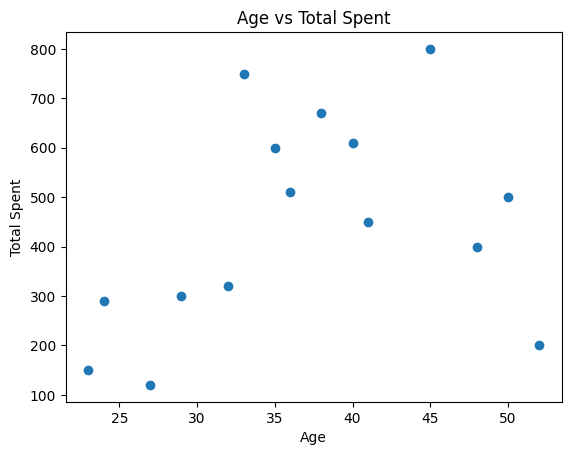

In [20]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'], df['Total Spent'])
plt.xlabel('Age')
plt.ylabel('Total Spent')
plt.title('Age vs Total Spent')
plt.show()

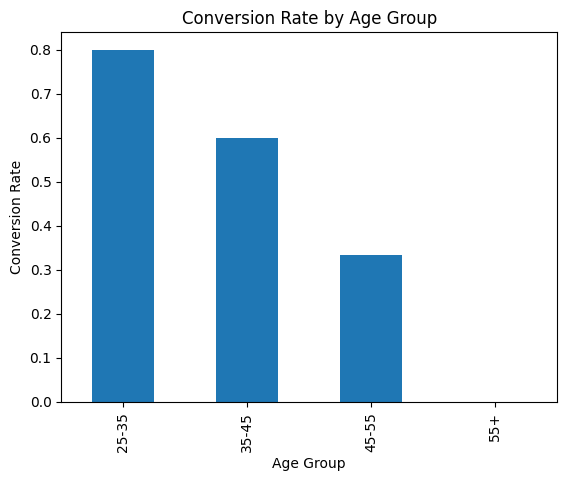

In [22]:
conversion_by_age.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Age Group')
plt.show()

In [23]:
df['Spending Category'] = pd.cut(df['Total Spent'], bins = [0, 200, 500, 1000], labels=['Low', 'Medium', 'High'])
conversion_by_spending = df.groupby('Spending Category')['Converted'].mean()
print(conversion_by_spending)

Spending Category
Low       0.666667
Medium    0.333333
High      0.833333
Name: Converted, dtype: float64


<ipython-input-23-a9fdabb90937>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_by_spending = df.groupby('Spending Category')['Converted'].mean()


In [24]:
import statsmodels.api as sm

x = df['Age']
y = df['Total Spent']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Total Spent   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     1.843
Date:                Sat, 19 Oct 2024   Prob (F-statistic):              0.198
Time:                        07:48:22   Log-Likelihood:                -100.29
No. Observations:                  15   AIC:                             204.6
Df Residuals:                      13   BIC:                             206.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.2500    229.877      0.614      0.5

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


In [25]:
df['Gender_num'] = df['Gender'].map({'M': 0, 'F': 1})


x = df['Gender_num']
y= df['Total Spent']

x = sm.add_constant(x)

gender_model = sm.OLS(y, x).fit()
print(gender_model.summary())

                            OLS Regression Results                            
Dep. Variable:            Total Spent   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.8437
Date:                Sat, 19 Oct 2024   Prob (F-statistic):              0.375
Time:                        07:57:56   Log-Likelihood:                -100.81
No. Observations:                  15   AIC:                             205.6
Df Residuals:                      13   BIC:                             207.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        390.0000     81.494      4.786      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


In [26]:
x = df[['Age', 'Gender_num']]
y = df[['Total Spent']]

x = sm.add_constant(x)


multi_model = sm.OLS(y, x).fit()
print(multi_model.summary())


                            OLS Regression Results                            
Dep. Variable:            Total Spent   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.102
Date:                Sat, 19 Oct 2024   Prob (F-statistic):              0.363
Time:                        08:07:36   Log-Likelihood:                -100.02
No. Observations:                  15   AIC:                             206.0
Df Residuals:                      12   BIC:                             208.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        134.2325    235.223      0.571      0.5

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


In [27]:
x = df[['Age', 'Gender_num']]
y = df['Converted']

x = sm.add_constant(x)


logit_model = sm.Logit(y, x).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.493945
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                   15
Model:                          Logit   Df Residuals:                       12
Method:                           MLE   Df Model:                            2
Date:                Sat, 19 Oct 2024   Pseudo R-squ.:                  0.2661
Time:                        08:08:54   Log-Likelihood:                -7.4092
converged:                       True   LL-Null:                       -10.095
Covariance Type:            nonrobust   LLR p-value:                   0.06815
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2570      3.598      1.461      0.144      -1.795      12.309
Age           -0.1653      0.

In [28]:
x = df[['Age', 'Gender_num']]
y = pd.get_dummies(df['Spending Category'], drop_first=True)

x = sm.add_constant(x)

multi_cat_model = sm.MNLogit(y, x).fit()
print(multi_cat_model.summary())

Optimization terminated successfully.
         Current function value: 0.560051
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                   15
Model:                        MNLogit   Df Residuals:                       12
Method:                           MLE   Df Model:                            2
Date:                Sat, 19 Oct 2024   Pseudo R-squ.:                  0.1678
Time:                        08:12:16   Log-Likelihood:                -8.4008
converged:                       True   LL-Null:                       -10.095
Covariance Type:            nonrobust   LLR p-value:                    0.1837
    y=High       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2932      2.339     -0.553      0.580      -5.877       3.291
Age            0.0108      0.

In [38]:
X = df['Comment Lenght']
y = df['Total Spent']

x = sm.add_constant(x)

comment_lenght_model = sm.OLS(y, x).fit()
print(comment_lenght_model.summary())

                            OLS Regression Results                            
Dep. Variable:            Total Spent   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.076
Method:                 Least Squares   F-statistic:                  0.009408
Date:                Sat, 19 Oct 2024   Prob (F-statistic):              0.924
Time:                        08:17:32   Log-Likelihood:                -101.28
No. Observations:                  15   AIC:                             206.6
Df Residuals:                      13   BIC:                             208.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            462.5000    192.620      2.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


In [40]:
from sklearn.preprocessing import PolynomialFeatures

x = df[['Age']]
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

x_poly = sm.add_constant(x_poly)

poly_model = sm.OLS(df['Total Spent'], x_poly).fit()
print(poly_model.summary())

                            OLS Regression Results                            
Dep. Variable:            Total Spent   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     8.045
Date:                Sat, 19 Oct 2024   Prob (F-statistic):            0.00608
Time:                        08:20:27   Log-Likelihood:                -94.906
No. Observations:                  15   AIC:                             195.8
Df Residuals:                      12   BIC:                             197.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2273.5428    700.463     -3.246      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


In [42]:
x_multi = df[['Age', 'Gender_num']]

x_multi = sm.add_constant(x_multi)

multi_model = sm.OLS(df['Total Spent'], x_multi).fit()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:            Total Spent   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.102
Date:                Sat, 19 Oct 2024   Prob (F-statistic):              0.363
Time:                        08:22:34   Log-Likelihood:                -100.02
No. Observations:                  15   AIC:                             206.0
Df Residuals:                      12   BIC:                             208.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        134.2325    235.223      0.571      0.5

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


In [44]:
from sklearn.linear_model import LogisticRegression

x_logit = df[['Age','Gender_num']]
y_logit = df['Converted']

logit_model = LogisticRegression()
logit_model.fit(x_logit, y_logit)

print("Model coefficients: ", logit_model.coef_)
print("Model intercept: ", logit_model.intercept_)

Model coefficients:  [[-0.1033762   0.87446591]]
Model intercept:  [3.81861468]


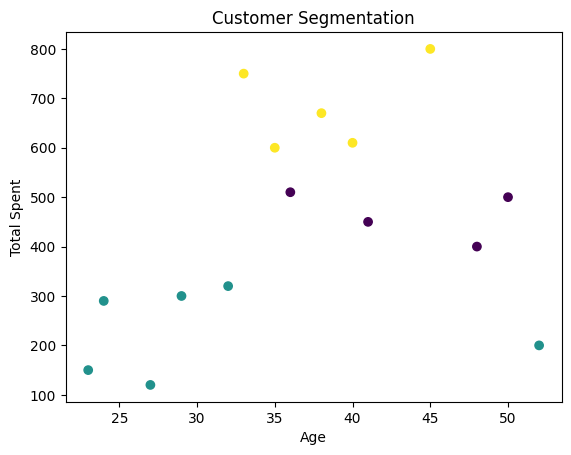

In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

x_cluster = df[['Age', 'Total Spent']]

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(x_cluster)


plt.scatter(df['Age'], df['Total Spent'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Total Spent')
plt.title('Customer Segmentation')
plt.show()

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = df[['Age', 'Gender_num']]
y = df['Converted']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train, y_train)

y_pred = tree_model.predict(x_test)


print("Model Accuracy: ", accuracy_score(y_test, y_pred))

Model Accuracy:  0.3333333333333333
